# harm_take2
## Purpose: Learn how to use the aneris tool for harmonization
Struggling with aneris... take 2 based on Smith script
- Historical (1750-2022) and projected (2020-2100) emissions datasets
    - Historical dataset is product of PRIMAP, CEDS, GCP, & GFED
    - Projected datasets are outputs of GCAM 6.0 NGFS and MESSAGEix-GLOBIOM (will focus on one at a time)
    
    
Credit: 
- Gidden, M. (2017). gidden/aneris: Initial release version for harmonization paper (v0.1.0). Zenodo. https://doi.org/10.5281/ZENODO.802832
- https://github.com/chrisroadmap/fair-calibrate/blob/main/input/fair-2.1.3/v1.4/all-2022/calibration/12_harmonize-emissions.py


## Erica Simon, 02/02/24

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import aneris
import aneris.convenience
from tqdm.auto import tqdm

import datetime
import os
import warnings

/tmp/ipykernel_14048/848097968.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<IPython.core.display.Javascript object>

## Import datasets

In [2]:
GCAM_proj_emis = pd.read_csv('~/outputs/NGFS_GCAM_interp.csv')
MSG_proj_emis = pd.read_csv('~/outputs/NGFS_MSG_cleaned.csv')

hist = pd.read_csv('~/outputs/hist_GCAM.csv')

In [3]:
future = GCAM_proj_emis

In [4]:
progress = os.getenv("PROGRESS", "False").lower() in ("true", "1", "t")

In [6]:
# all code from https://github.com/chrisroadmap/fair-calibrate/blob/main/input/fair-2.1.3/v1.4/all-2022/calibration/12_harmonize-emissions.py

harmonisation_year = 2022

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scenarios_harmonised = [
        aneris.convenience.harmonise_all(
            msdf,
            history=hist,
            year=harmonisation_year,
            # overrides=overrides,
        )
        for _, msdf in tqdm(future.groupby(["Model", "Scenario"]), disable=1 - progress)
    ]
# reset_index is needed above because aneris for some reason gives us two copies of
# the MultiIndex

scenarios_harmonised = pd.concat(scenarios_harmonised).reset_index()

INFO:root:Harmonizing with reduce_ratio_2080
INFO:root:Harmonizing with reduce_offset_2150_cov
INFO:root:Harmonizing with constant_ratio
INFO:root:Harmonizing with reduce_ratio_2080
INFO:root:Harmonizing with reduce_offset_2150_cov
INFO:root:Harmonizing with constant_ratio
INFO:root:Harmonizing with reduce_ratio_2080
INFO:root:Harmonizing with reduce_offset_2150_cov
INFO:root:Harmonizing with constant_ratio
INFO:root:Harmonizing with reduce_ratio_2080
INFO:root:Harmonizing with reduce_offset_2150_cov
INFO:root:Harmonizing with constant_ratio
INFO:root:Harmonizing with reduce_ratio_2080
INFO:root:Harmonizing with reduce_offset_2150_cov
INFO:root:Harmonizing with constant_ratio
INFO:root:Harmonizing with reduce_ratio_2080
INFO:root:Harmonizing with reduce_offset_2150_cov
INFO:root:Harmonizing with constant_ratio
INFO:root:Harmonizing with reduce_ratio_2080
INFO:root:Harmonizing with reduce_offset_2150_cov
INFO:root:Harmonizing with constant_ratio


In [11]:
scenarios_harmonised.head()

,model,scenario,region,variable,unit,2022,2023,2024,2025,2026,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,GCAM 6.0 NGFS,Below 2 C,World,Emissions|BC,Mt BC/yr,6.701702,6.514716,6.328371,6.142668,5.970416,...,1.908504,1.909592,1.910681,1.911769,1.912858,1.913896,1.914934,1.915973,1.917011,1.918049
1,GCAM 6.0 NGFS,Below 2 C,World,Emissions|C2F6,kt C2F6/yr,1.167145,1.191345,1.215545,1.239745,1.204444,...,0.873045,0.868214,0.863383,0.858552,0.853721,0.849633,0.845546,0.841459,0.837372,0.833284
2,GCAM 6.0 NGFS,Below 2 C,World,Emissions|CF4,kt CF4/yr,7.204285,7.273050,7.341815,7.410581,7.378907,...,2.907157,2.817994,2.728830,2.639667,2.550504,2.477945,2.405386,2.332827,2.260268,2.187709
3,GCAM 6.0 NGFS,Below 2 C,World,Emissions|CH4,Mt CH4/yr,378.405896,377.950220,377.491840,377.030757,370.793608,...,246.543212,246.884856,247.226500,247.568144,247.909788,248.005228,248.100668,248.196108,248.291548,248.386987
4,GCAM 6.0 NGFS,Below 2 C,World,Emissions|CO,Mt CO/yr,758.190637,740.871864,723.553092,706.234320,687.510600,...,328.709101,328.555212,328.401323,328.247434,328.093546,328.078194,328.062842,328.047491,328.032139,328.016787


## Visualize

In [21]:
ch4_hist = hist.loc[hist.Variable == 'Emissions|CH4'].values[0][255:]
ch4_raw = GCAM_proj_emis.loc[GCAM_proj_emis.Variable == 'Emissions|CH4'].loc[GCAM_proj_emis.Scenario == 'Current Policies'].values[0][7:]
ch4_harm = scenarios_harmonised.loc[scenarios_harmonised.variable == 'Emissions|CH4'].loc[scenarios_harmonised.scenario == 'Current Policies'].values[0][5:]

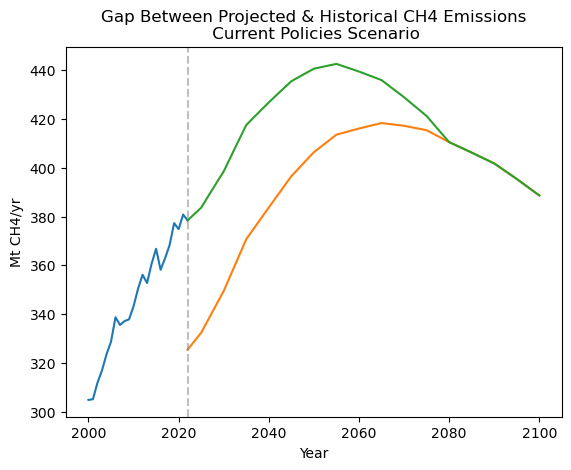

In [22]:
plt.plot(np.arange(2000, 2023), ch4_hist)
plt.plot(np.arange(2022, 2101), ch4_raw)
plt.plot(np.arange(2022, 2101), ch4_harm)
plt.axvline(2022, linestyle='--', color='grey', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Mt CH4/yr')
plt.title('Gap Between Projected & Historical CH4 Emissions\n Current Policies Scenario')
plt.show()